<a href="https://colab.research.google.com/github/Bhupendra-glitch/Experimentation-Uplift-Modeling/blob/main/Experimentation_Uplift_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Intro**


# Import liberies

**Quick View**

In [2]:
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

seed = 47

In [3]:
pdf_train = pd.read_csv('/content/pdf (1).csv')
pdf = pdf_train.copy()
pdf.shape

(158226, 196)

In [4]:
pdf.head()

,CardHolder,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,...,sale_sum_6m_g24,sale_sum_6m_g25,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m
0,16095858,47.0,3.0,22.0,19.0,3.0,28.0,8.0,7.0,6.0,...,3141.25,356.67,237.25,283.84,3648.23,1195.37,535.42,1.7078,0.2798,0.3008
1,15906620,57.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,...,113.39,62.69,58.71,87.01,179.83,0.00,122.98,0.0000,0.0000,0.0000
2,16495466,38.0,7.0,0.0,15.0,4.0,9.0,5.0,9.0,14.0,...,1239.19,533.46,83.37,593.13,1217.43,1336.83,3709.82,0.0000,NaN,0.0803
3,16570217,65.0,6.0,3.0,25.0,2.0,10.0,14.0,11.0,8.0,...,139.68,1849.91,360.40,175.73,496.73,172.58,1246.21,0.0000,0.0000,0.0000
4,16346871,61.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,...,226.98,168.05,461.37,0.00,237.93,225.51,995.27,1.4142,0.3495,0.3495


In [5]:
#pdf.describe()

,CardHolder,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,...,sale_sum_6m_g24,sale_sum_6m_g25,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m
count,1.582260e+05,155565.000000,158226.000000,158226.000000,158226.000000,158226.000000,158226.000000,158226.000000,158226.000000,158226.000000,...,157585.000000,157585.000000,157585.000000,157585.000000,157585.00000,157585.000000,157585.000000,140449.000000,125887.000000,125762.000000
mean,1.613921e+07,43.753614,2.558486,3.521905,5.698438,2.923097,5.364871,4.775960,2.207874,5.536739,...,739.335864,217.126934,340.044217,337.369864,785.65074,431.580016,399.724252,0.291799,0.070410,0.113332
std,2.868027e+05,14.843450,5.042344,6.563471,10.609104,5.886268,9.046296,7.883573,4.004028,8.860754,...,1903.619856,480.307613,808.566689,874.854577,1699.14589,885.007035,837.317974,0.910063,0.126993,0.142438
min,1.564313e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.589098e+07,32.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.613929e+07,42.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,...,219.960000,61.980000,75.980000,0.000000,219.79000,139.760000,133.880000,0.000000,0.000000,0.000000
75%,1.638758e+07,56.000000,3.000000,4.000000,6.000000,3.000000,6.000000,6.000000,3.000000,7.000000,...,774.570000,229.430000,355.380000,311.150000,828.86000,502.820000,436.650000,0.000000,0.104100,0.227000
max,1.663566e+07,100.000000,175.000000,193.000000,459.000000,203.000000,223.000000,250.000000,152.000000,364.000000,...,165933.400000,40458.450000,85765.510000,36958.790000,119375.25000,61237.960000,72108.070000,9.192400,0.699800,0.706600




*   There are 196 colum in teh dataset
*   The target variable is 'Response_att'- we have to predict whether the clien will respond to the market mailing.
*   Audiance is divived into 2 samples - Test and Control.
*  the dataset gives us basic information about the client like -  his age, number of child, etc.
* There is also a lot of information about some groups of goods (it's necessary for searching insights) and a lot of statistical information for example the coefficients of variation of discounts or prices


**There are also few categories columns: gender and group. we trasfer them into binary feature. **

In [6]:
gender_map = {'X' : 0, 'M' : 1}
group_map = {'test' : 0, 'control' : 1}
pdf['gender'] = pdf['gender'].map(gender_map)
pdf['group'] = pdf['group'].map(group_map)

**Missing values**

In [7]:
print('Number NA:', pdf.isna().sum().sum())
print('Amount of all values:', pdf.shape[0]*pdf.shape[1])
print('Missed Data Percentage:', round(100*pdf.isna().sum().sum()/(pdf.shape[0]*pdf.shape[1]), 2), '%')

Number NA: 6052639
Amount of all values: 31012296
Missed Data Percentage: 19.52 %


In [8]:
#missing data
total = pdf.isnull().sum().sort_values(ascending=False)
percent = (pdf.isnull().sum()/pdf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
gender,158226,1.000000
k_var_sku_price_15d_g49,114108,0.721171
k_var_disc_share_15d_g49,114088,0.721045
k_var_count_per_cheque_15d_g34,107886,0.681847
k_var_sku_price_15d_g34,107886,0.681847
k_var_disc_share_15d_g34,107868,0.681734
k_var_count_per_cheque_15d_g24,101948,0.644319
k_var_disc_share_15d_g24,101933,0.644224
k_var_sku_price_1m_g49,95529,0.603750
k_var_count_per_cheque_1m_g49,95529,0.603750


In [11]:
# dealing with missing data
pdf = pdf.fillna(np.nan)
pdf_col_list = list(pdf.columns)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
pdf = pd.DataFrame(imputer.fit_transform(pdf), colums=pdf_col_list)

print('Number NA:', pdf.isna().sum().sum())

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['gender']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


TypeError: DataFrame.__init__() got an unexpected keyword argument 'colums'

In [12]:
#dealing with missing data
pdf = pdf.fillna(np.nan)
pdf_col_list = list(pdf.columns)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
pdf = pd.DataFrame(imputer.fit_transform(pdf), columns=pdf_col_list)

print('Number NA:', pdf.isna().sum().sum())

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['gender']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


ValueError: Shape of passed values is (158226, 195), indices imply (158226, 196)

**Outliers**

Outliers can markedly affect on our models and can be a valuable soruce of information providing us insight about specific behaviours.

In [13]:
# Group number is in range from 20 to 79
all_groups = [i for i in range(20, 80)]
pdf_outliers = pdf.copy()

# This function returns columns from 'columns' list, which are met in columns of "data"
def get_columns_list(data, columns):
    return data.columns[data.columns.isin(columns)]

We will collect the features that interest us: some are already in the dataset, some will have to be collected separately. These features describe the data in general way but for a fact-finding analysis this is enough.

In [14]:
collect_features = {
    'cheque_count_12m_max'             : (get_columns_list(pdf_outliers, ['cheque_count_12m_g{}'.format(i) for i in all_groups]), 'sum'),
    'children'                         : (['children'], 'max'),
    'crazy_purchases_cheque_count_12m' : (['crazy_purchases_cheque_count_12m'], 'max'),
    'k_var_disc_share_6m_max'          : (get_columns_list(pdf_outliers, ['k_var_disc_share_6m_g{}'.format(i) for i in all_groups]), 'max'),
    'k_var_sku_price_6m_max'           : (get_columns_list(pdf_outliers, ['k_var_sku_price_6m_g{}'.format(i) for i in all_groups]), 'max'),
    'sale_sum_12m_sum'                  : (get_columns_list(pdf_outliers, ['sale_sum_6m_g{}'.format(i) for i in all_groups]), 'sum'),
}

In [15]:
for key in collect_features.keys():
    method = collect_features[key][1]

    if method == 'max':
        pdf_outliers.loc[:, key] = pdf_outliers[collect_features[key][0]].max(axis=1)
    elif method == 'sum':
        pdf_outliers.loc[:, key] = pdf_outliers[collect_features[key][0]].sum(axis=1)
    elif method == 'max':
        pdf_outliers.loc[:, key] = pdf_outliers[collect_features[key][0]].max(axis=1)
    elif method == 'min':
        pdf_outliers.loc[:, key] = pdf_outliers[collect_features[key][0]].min(axis=1)

According to the collected features, we look at the outliers, which are determined by the proportions relative to the IQR. We will divide the obtained records into records from the test and control groups and divide them by participation in our chosen action. Let's look at the results.

Column cheque_count_12m_max
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0     99603  101616    102882  103747
1     test_1      9682   10431     11017   11456
2  control_0     33351   33976     34395   34675
3  control_1      2882    3125      3320    3447


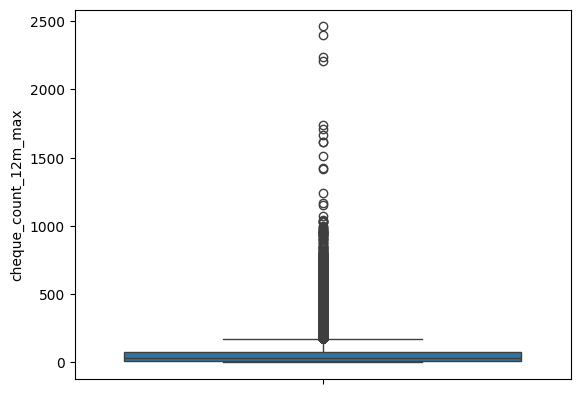

Column children
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0    100667  104500    104500  104578
1     test_1     12446   12870     12870   12875
2  control_0     33585   34870     34870   34904
3  control_1      3769    3907      3907    3910


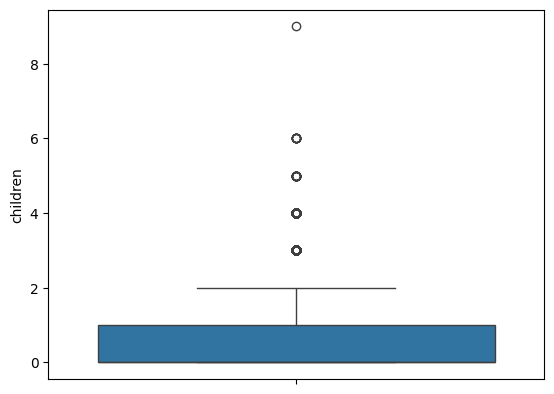

Column crazy_purchases_cheque_count_12m
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0     98669  101060    101913  103142
1     test_1     10030   10791     11088   11596
2  control_0     33045   33800     34067   34461
3  control_1      3055    3296      3392    3515


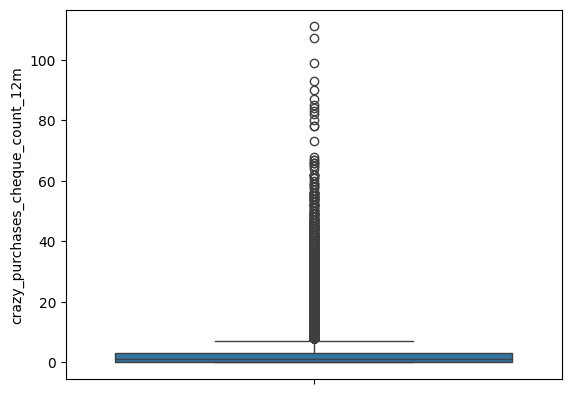

Column k_var_disc_share_6m_max
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0    105100  105159    105209  105224
1     test_1     13016   13035     13048   13062
2  control_0     35067   35088     35096   35105
3  control_1      3956    3962      3967    3968


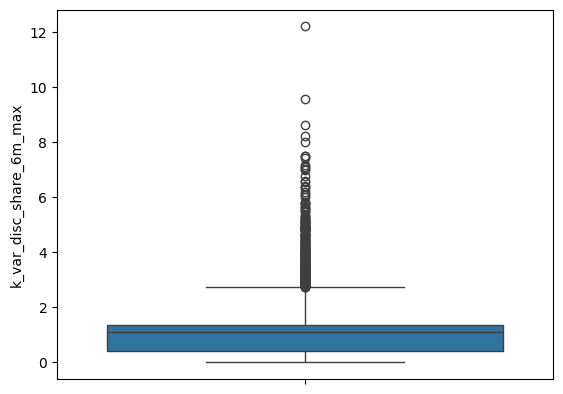

Column k_var_sku_price_6m_max
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0    105044  105269    105315  105324
1     test_1     12960   13073     13105   13108
2  control_0     35035   35116     35130   35136
3  control_1      3929    3962      3972    3977


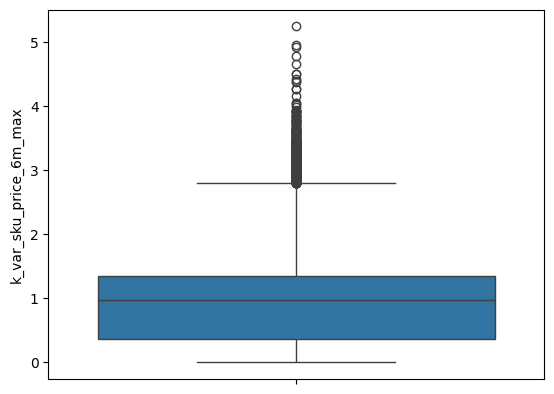

Column sale_sum_12m_sum
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0     98250  100184    101587  102559
1     test_1      9499   10216     10759   11172
2  control_0     32918   33555     33985   34287
3  control_1      2862    3081      3244    3376


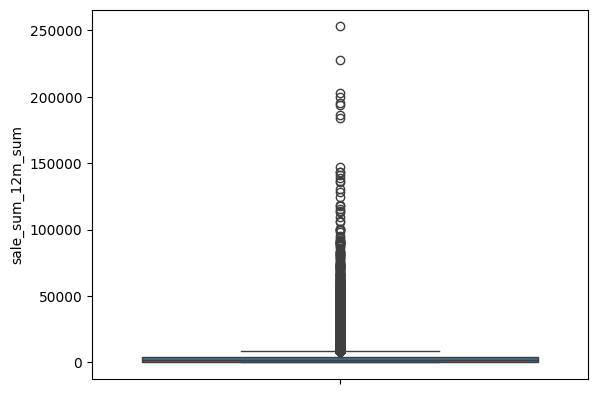

In [16]:
for key in collect_features.keys():
    print('Column', key)

    dataframe = {'Type' : ['test_0', 'test_1', 'control_0', 'control_1']}
    for whis in [1.5, 2, 2.5, 3]:
        IQR = pdf_outliers[key].quantile(0.75) - pdf_outliers[key].quantile(0.25)
        sample = pdf_outliers[pdf_outliers[key] <= pdf_outliers[key].quantile(0.75) + IQR * whis]
        sample_test = sample[sample['group'] == 0]['response_att'].value_counts()
        sample_control = sample[sample['group'] == 1]['response_att'].value_counts()

        dataframe['whis {}'.format(whis)] = [sample_test[0], sample_test[1], sample_control[0], sample_control[1]]

    print(pd.DataFrame(dataframe))
    sns.boxplot(pdf_outliers[key])
    plt.show()

<Axes: >

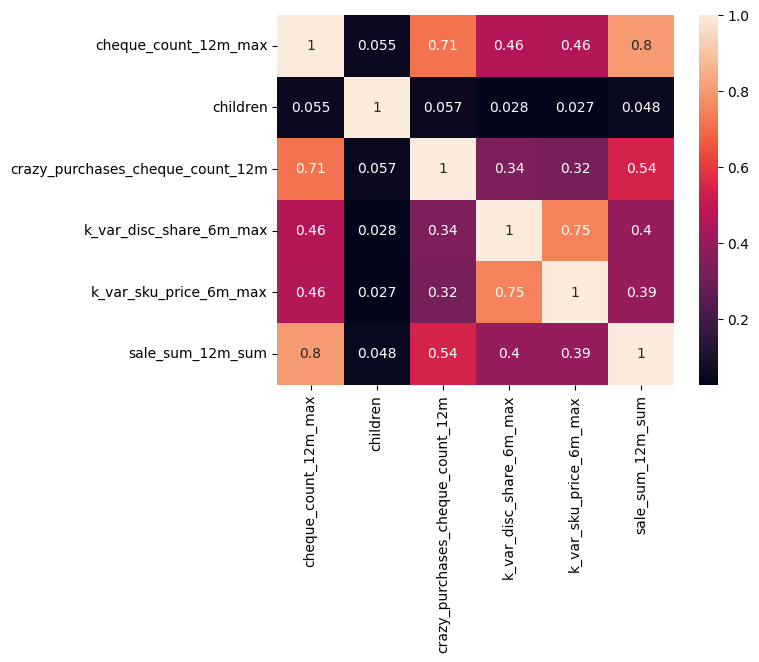

In [17]:
sns.heatmap(pdf_outliers[[key for key in collect_features.keys()]].corr(), annot=True)